# Simple Video Game Exploration & Prediction

## Introduction

In this notebook kernel we are going to be looking at the dataset of video game sales from the 1990's to the current years of 2016.

The purpose of exploring this data is to observe trends and habits that seem to be present in game sales over a period of time. With this data we will attempt to see if we can train a model to predict game sales into the near future. Although this dataset is older, we can actively see if the predictions are right with what is now on the market in the current day. Of course, this does not account for new consoles released in the past few years, as capturing accurate data on game sales for modern and upcoming systems has become increasingly challenging.

The plan to achieve our objective involves several key steps: 
- Conducting Data Exploration
- Conducting Data Processing 
- Use DecisionTreeRegressor, RandomForestRegressor, and XGBRegressor models.
    - Perform cross-validation to ensure the accuracy of our chosen model
- Check the accuracy of our trained model with the real data.

## The Data

##### Import important libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import(
    train_test_split,
)

In [7]:
vgsales = pd.read_csv("vgsales.csv")
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Luckily our data we have is extremely uniform, with many of the columns having almost the exact same amount of values except for the Year and Publisher columns. 

In [8]:
vgsales.columns.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

We get 11 columns to mess with in this dataset:
- **Rank**: This is the rank of the game in descending order of the most Global Sales

- **Name**: The name of the game or franchise

- **Platform**: The platform the game was released on (since there are games that came out on multiple platforms there will be mild duplicates)

- **Year**: release year for the game

- **Genre**: The genre of the game

- **Publisher**: The publisher of the game

- **NA_Sales**: Number of copies sold in America

- **EU_Sales**: Number of copies sold in Europe

- **JP_Sales**: Number of copies sold in Japan

- **Other_Sales**: Sales in places that are not in America, Europe, nor Japan

- **Global Sales**: These are the combined sales for all of the regions

Since the dataset comes with these, we will not be changing the naming of them in our analysis

##### Quick look at the data

In [9]:
#A quick look at the head 
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
# A quick look at the tail
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [11]:
# A quick look at some random data
vgsales.sample(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11265,11267,Lara Croft and the Temple of Osiris,PS4,2014.0,Action,Square Enix,0.00,0.07,0.00,0.01,0.08
10925,10927,Shin Megami Tensei,PS,2001.0,Role-Playing,Atlus,0.00,0.00,0.09,0.01,0.09
11874,11876,Viewpoint,PS,1995.0,Shooter,Electronic Arts,0.04,0.03,0.00,0.00,0.07
6356,6358,Mat Hoffman's Pro BMX,GBA,2001.0,Sports,Activision,0.19,0.07,0.00,0.00,0.27
14748,14751,Eureka Seven AO: Jungfrau no Hanabanatachi,PS3,2012.0,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
13654,13656,Watashi no Relaxuma,DS,2007.0,Simulation,Rocket Company,0.00,0.00,0.04,0.00,0.04
15353,15356,Demolition Company: Gold Edition,PC,2011.0,Simulation,NaN,0.00,0.02,0.00,0.00,0.02
7999,8001,Hello Kitty: Birthday Adventures,DS,2010.0,Adventure,Namco Bandai Games,0.06,0.11,0.00,0.02,0.18
4886,4888,NBA 2K10,Wii,2009.0,Sports,Take-Two Interactive,0.36,0.00,0.00,0.03,0.39
10279,10281,Dynasty Tactics 2,PS2,2003.0,Strategy,Tecmo Koei,0.05,0.04,0.00,0.01,0.11


### Data Cleaning 

Since our data is relatively complete, we only need to do a small amount of cleaning of the data, such as missing Year and Publisher Values.

##### Inspecting missing values

In [7]:
null_years = vgsales[vgsales['Year'].isnull()]
null_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 179 to 16493
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          271 non-null    int64  
 1   Name          271 non-null    object 
 2   Platform      271 non-null    object 
 3   Year          0 non-null      float64
 4   Genre         271 non-null    object 
 5   Publisher     249 non-null    object 
 6   NA_Sales      271 non-null    float64
 7   EU_Sales      271 non-null    float64
 8   JP_Sales      271 non-null    float64
 9   Other_Sales   271 non-null    float64
 10  Global_Sales  271 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 25.4+ KB


In [8]:
null_publishers = vgsales[vgsales['Publisher'].isnull()]
null_publishers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 470 to 16553
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          58 non-null     int64  
 1   Name          58 non-null     object 
 2   Platform      58 non-null     object 
 3   Year          36 non-null     float64
 4   Genre         58 non-null     object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      58 non-null     float64
 7   EU_Sales      58 non-null     float64
 8   JP_Sales      58 non-null     float64
 9   Other_Sales   58 non-null     float64
 10  Global_Sales  58 non-null     float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.4+ KB


Null Publishers will be filled with 'Unknown' and missing years will be filled with the median year (a good inbetween). Doing this will help in preserving valuable sales data that is still attached to these missing instances.


In [9]:
# Replace Null with Unknown 
vgsales['Publisher'] = vgsales['Publisher'].fillna('Unknown')

# Replace Null Years with median year
middle_years = vgsales['Year'].median()
vgsales['Year'] = vgsales['Year'].fillna(middle_years)
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


With filling in those values our datset is now full with values

## Data Exploration

With our data exploration we are simply going to look at how all of the game sales compared at the time. 

Examples like: 

- What are the global sales over time? 

- What Genre sold the best overall? 

- What Genre was most popular each year? 

- Which Genre and Platforms were received the best according to region? 

- What Platform performed the best overall?  

- What game sold the best each year? 

- What are the most grossed video games overall? 

- Which platform sold the most per year and how much? 

- Of the Top 10 Platforms, how many games did each release total? 

- Who are the top selling Publishers per year? And overall? 

- What was the best genre on each platform?

And most importantly, for the objective of this project, 
- which answer to these questions matters the most when trying to predict the future? 

### Year Sales

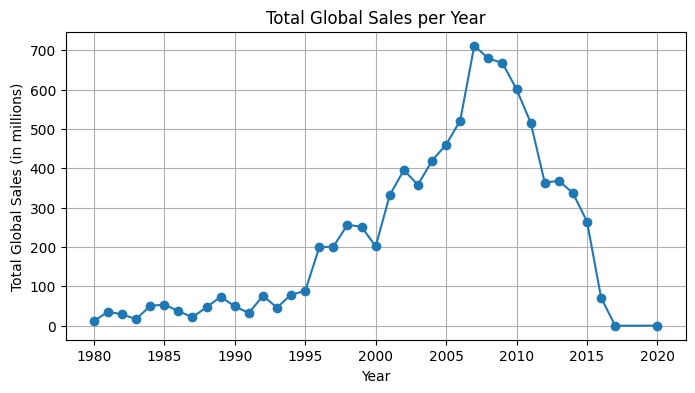

In [10]:

global_sales_per_year = vgsales.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(global_sales_per_year['Year'], global_sales_per_year['Global_Sales'], marker='o')
plt.title('Total Global Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.show()


Looking at this chart, around the year 1995 there was a dramatic increase in the amount of games that were being sold. Once we hit around 2007 there is a noticaeble peak and since then had been on a steep decline. This year is around the time when consoles like the Wii, PS3, and Xbox360 were dominant. 

However it should be duly noted that VGChartz stopped producing estimates of software sales by 2018. This was due to the increasing dominance of digital downloads and purchases, a far more complex process. Digital downloads and purchases of video games first presented itself in the early 2000s, and then took off when platforms like Steam got introduced. All of that seems to be reflected in this graph, including the shortcoming of being able to keep up with video game sales accuracy. 

### Genre Sales

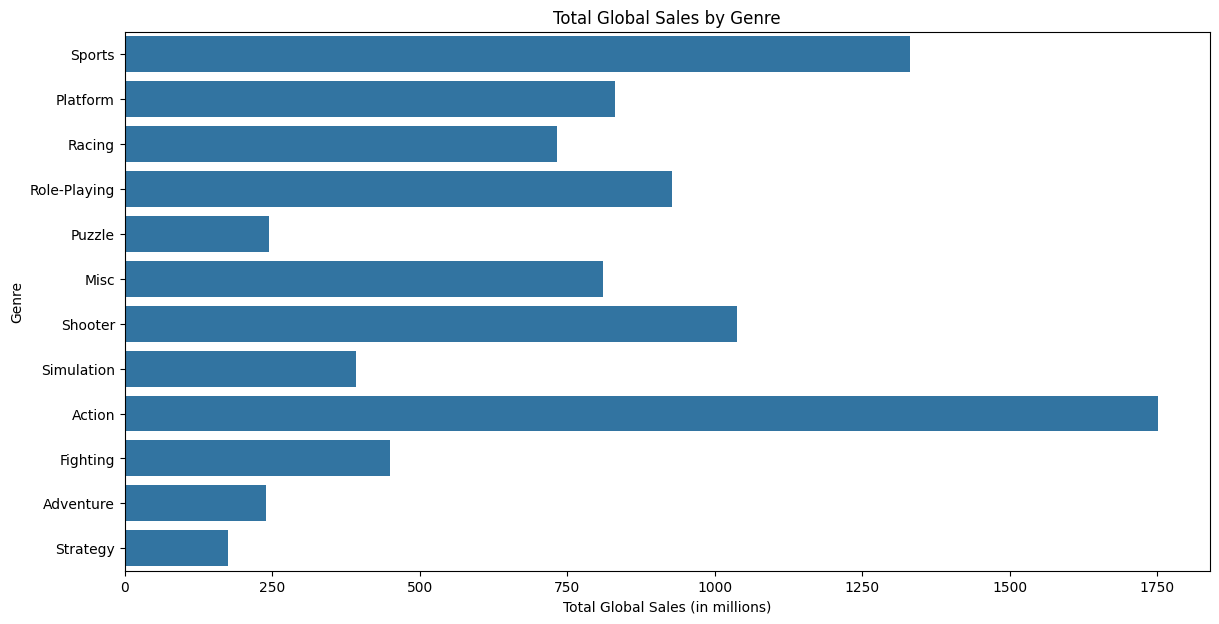

In [11]:
# Sales by Genre
plt.figure(figsize=(14, 7))
sns.barplot(x='Global_Sales', y='Genre', data=vgsales, estimator=sum, errorbar=None)
plt.title('Total Global Sales by Genre')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Genre')
plt.show()

When attempting to make predicts on future video games sales, the question of what component has the bigger impact on sales has to be asked. Many would assume that genre would have the biggest impact. 
With this graph we can see that out of all the catorgories, Action Games are certainly the most liked genre, having 1,750 million sales globally with Sports following behind with over 1,250 million sales. 

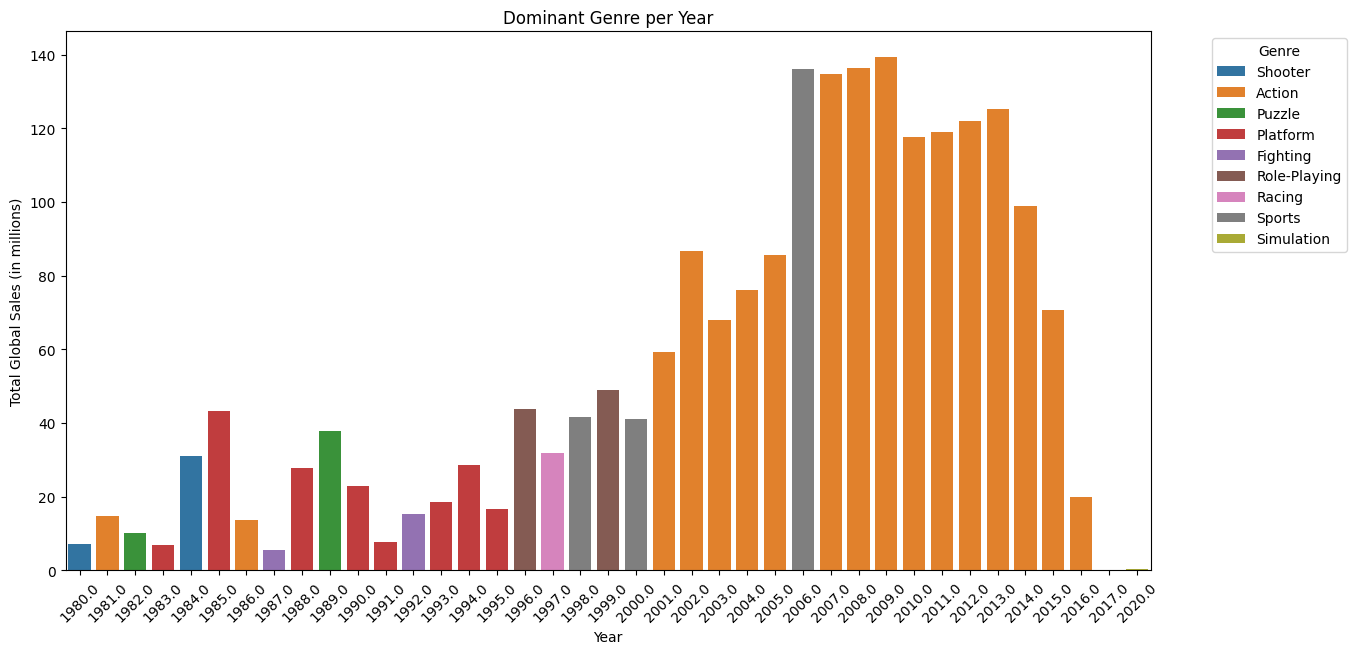

In [11]:
year_genre_sales = vgsales.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
dom_genre = year_genre_sales.loc[year_genre_sales.groupby('Year')['Global_Sales'].idxmax()]

plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=dom_genre, dodge=False)
plt.title('Dominant Genre per Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()



Examining most popular genres of each year reveals the growing domincance of Actions games in more recent times. As gaming sales had kicked off around 1995 and rapidly increased, Action games swiftly took the top ranks, maintaining what seems to an almost consistent lead from 2001 to current day. The Action category completely overshadowed the mild dominance that Platformer games had during the earlier phases of gaming production. 

This graph makes it evident that no other genre had much of a competing chance against Action games, with a surprsing expection from the Sports categorying in 2006. A particularly interesting observation considering that Sports games were only top-selling in 1998 and 2000, reaching slightly above 40 million sale. Only to make an impressive leap in 2006 of up to nearly 140 million sales, before returning the throne to the Action category. 

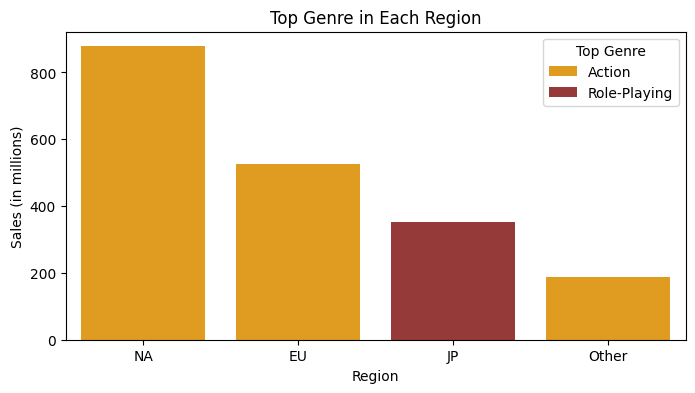

In [18]:
genre_sales = vgsales.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].reset_index()

top_genre_na = genre_sales.loc[genre_sales['NA_Sales'].idxmax()]
top_genre_eu = genre_sales.loc[genre_sales['EU_Sales'].idxmax()]
top_genre_jp = genre_sales.loc[genre_sales['JP_Sales'].idxmax()]
top_genre_other = genre_sales.loc[genre_sales['Other_Sales'].idxmax()]

top_genres = pd.DataFrame({
    'Region': ['NA', 'EU', 'JP', 'Other'],
    'Top_Genre': [top_genre_na['Genre'], top_genre_eu['Genre'], top_genre_jp['Genre'], top_genre_other['Genre']],
    'Sales': [top_genre_na['NA_Sales'], top_genre_eu['EU_Sales'], top_genre_jp['JP_Sales'], top_genre_other['Other_Sales']]
})

#Adding consistent colors to stay... consistent with the previous graph
const_colors = {
    'Action': 'orange',
    'Role-Playing': 'brown'
}

plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Sales', hue='Top_Genre', data=top_genres, dodge=False, palette=const_colors)
plt.title('Top Genre in Each Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.legend(title='Top Genre')
plt.show()



When comparing top genres across regions (North America, Europe, Japan, and Other countries) Action continues to maintain its dominance, with the exception of Japan, where Role-Playing games takes the lead instead. 

While the purpose of this graph is to illustrate which genres dominate in certain regions, it also reveals the significant differences in the market audience size across regions. North America, for instance, had a whopping 800 million sales in the Action genre alone. In contrast, the 'Other' regions as a whole barely reaches 200 million sales for their top-selling genre, a staggering 600 million difference. This clearly indicates where the main aducience for video game sales actually lies in the market. 


### Platform

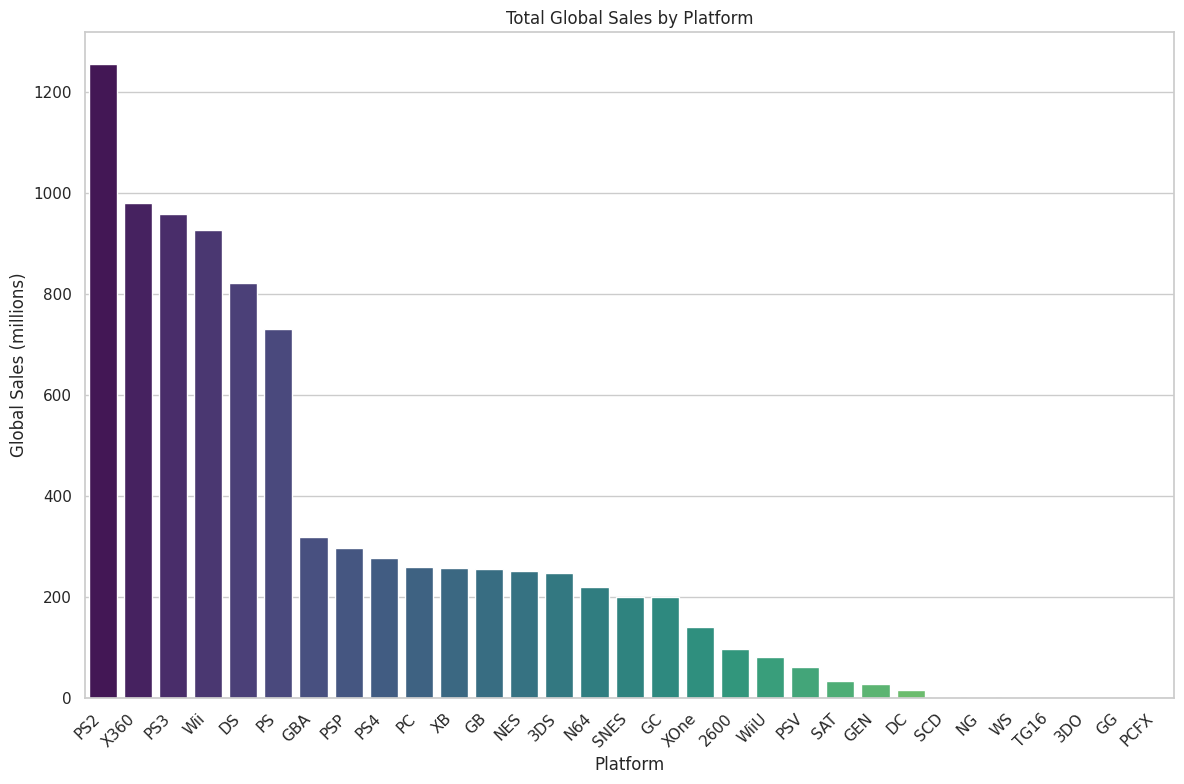

In [19]:
p_sales = vgsales.groupby('Platform')['Global_Sales'].sum().reset_index()
sorted_sales = p_sales.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(data=sorted_sales, x='Platform', y='Global_Sales', palette='viridis', hue='Platform', legend=False)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The data here clearly shows the PS2 as the top-selling platform within our data, having an impressive 1.2 billion sales. The Xbox 360 ranks second, falling about 200 million sales behind. This infomation of ranking is interesting condsidering that the PS2 is an older generation colse comparted to the Xbox 360. While there could be various reason for the PS2's dominance, such as number of games for console and etc, a significant facotr may be due to the increased difficulty in accurately recording and estimating total sales for more modern consoles. 

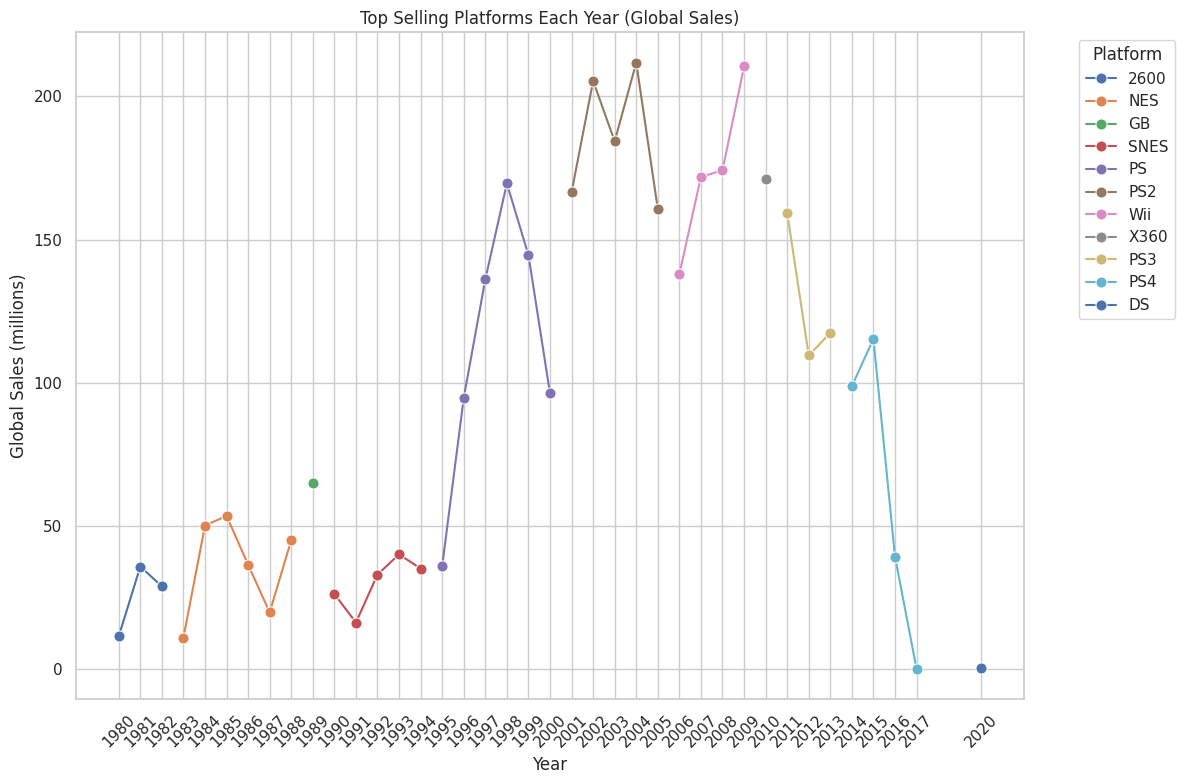

In [25]:
platform_sales_year = vgsales.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
top_platforms_year = platform_sales_year.loc[platform_sales_year.groupby('Year')['Global_Sales'].idxmax()]
top_platforms_year_sorted = top_platforms_year.sort_values(by='Year')

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(data=top_platforms_year_sorted, x='Year', y='Global_Sales', hue='Platform', marker='o', markersize=8, palette='deep')

plt.title('Top Selling Platforms Each Year (Global Sales)')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.xticks(top_platforms_year_sorted['Year'].unique())
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Looking at top-selling platforms for each specific year, there's an obvious trend of new consoles having their spotlight and dominating sales. The PS2, for instance, led from 2000 to 2005, with its peak year having above 200 million sales. It is illustrated that the introduction of a new console can dominate during its relevance. However, a noticalble decline in total globla sales begin almost immediately after 2009, when the Wii had reached the end of its era and the Xbox 360 had been marked as top-selling platform of 2010. The Xbox 360's sales were below 175 million sales, significantly less than the PS2's 200 million+ peak. Moving further down the years, as newer platforms like the PS3, PS4, and DS each took leads as top-selling, the graph shows a continued decline in total global sales, with the PS4 oddly jumping from above 100 million sales to 0 over the course of two years. The reason for pointing this out is that the declind is more likely a reflection of incomplete data collection of video games sales during the more recent years and not an accurate reflection of genuine sales trends among new upcoming consoles. With that said, according to our data, the graph presents the PS2 as the highest top-selling platform while having the most consistancy during its reign compared to its competitors. 

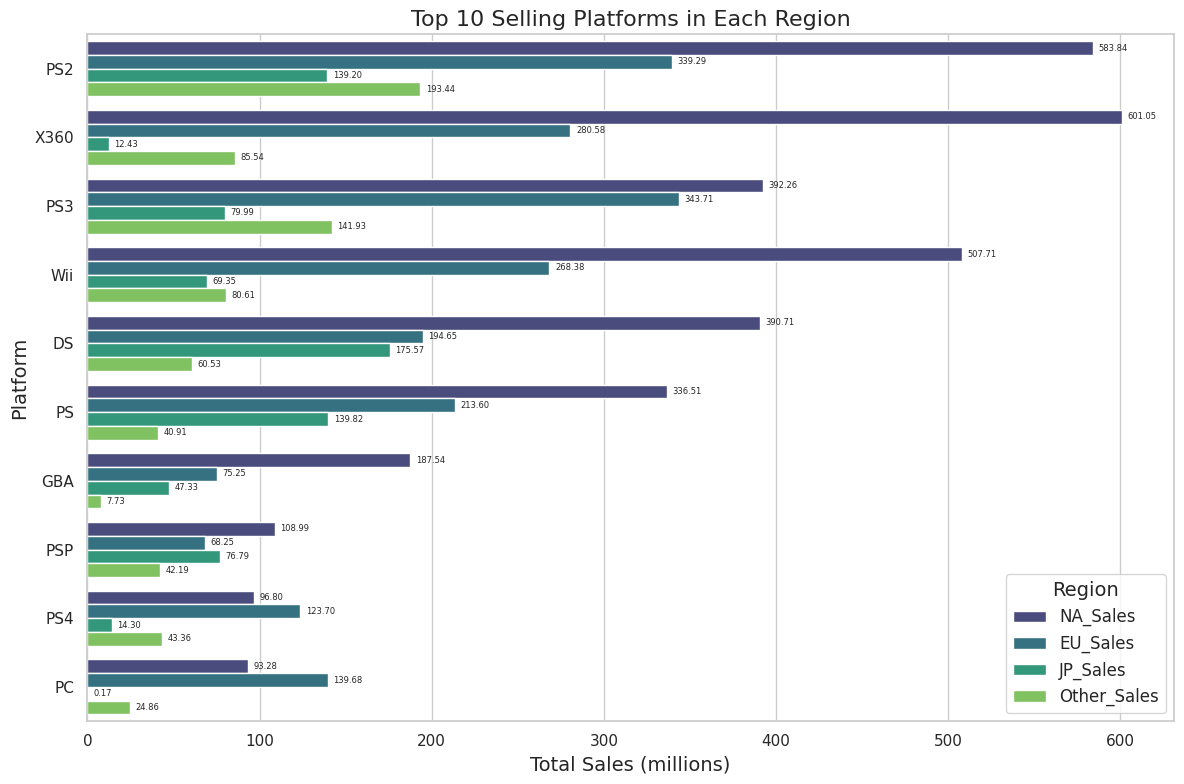

In [22]:
#Plotting the top 10 selling platforms in each region
platform_sales = vgsales.groupby('Platform').agg({'NA_Sales': 'sum','EU_Sales': 'sum','JP_Sales': 'sum','Other_Sales': 'sum'}).reset_index()
platform_sales['Total'] = platform_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
top_p = platform_sales.nlargest(10, 'Total')


# Melt the DataFrame to make it suitable for seaborn's barplot
melted = top_p.melt(id_vars='Platform',value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],var_name='Region',value_name='Sales')

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
# For labeling purposes
ax = sns.barplot(data=melted, x='Sales', y='Platform', hue='Region', palette='viridis')

plt.title('Top 10 Selling Platforms in Each Region', fontsize=16)
plt.xlabel('Total Sales (millions)', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.legend(title='Region', fontsize=12, title_fontsize=14)

for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=6, padding=4,)

plt.tight_layout()
plt.show()


This graph illustrates how different platforms perform across various regions, giving great insight into the global gaming market. There is a consistent trend where North America leads in sales, followed by Europe, with Japan and other regions typically sharing the third and fourth positions. With North American standing out as the main source of revenue, foreshadowing a high colrrelation that will be explored in a later section, it continues to confirm earlier observations about North American being a target audience when comparing top-ranked genres by region. 

Interestingly enough, while the PS2 is the highest-selling platform overall, the Xbox 360 outperformed in North America by nearly 20 million sales. However, the PS2 had a stronger performance in other regions which compensated for this difference. And the Wii ranked third in North America, surpassing that of the PS3, both consoles almost match in global sales due to PS3's higher popularity in other regions, taking third place in highest global sales. The way in which these platforms perform in different regions aligns with the global sales ranking seen earlier: 
1. PS2
2. Xbox 360
3. PS3
4. Wii
5. DS

and so on.

It should be noted, that new platforms such as the PS4 and PC have unusually lower sales, most likely due to lack of data. For example the PC only sold 170,000 units in Japan, an unrealistic number. 

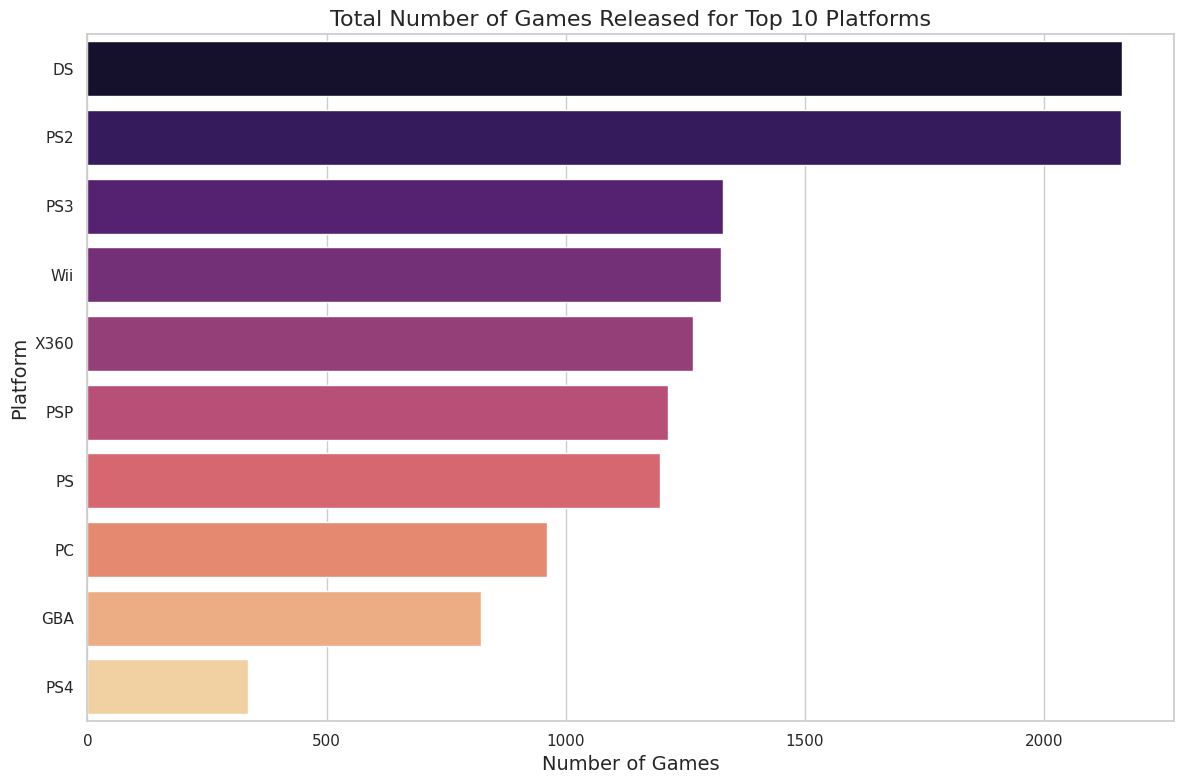

In [23]:
# Plotting the total number of games released for Top 10 platforms
platform_sales = vgsales.groupby('Platform').agg({'Global_Sales': 'sum'}).reset_index()
top_10_platforms = platform_sales.nlargest(10, 'Global_Sales')['Platform']
top_10_vgsales = vgsales[vgsales['Platform'].isin(top_10_platforms)]
platform_game_counts = top_10_vgsales['Platform'].value_counts().reset_index()
platform_game_counts.columns = ['Platform', 'Game Count']

ax = sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(data=platform_game_counts, x='Game Count', y='Platform', palette='magma', hue='Platform', legend=False)

plt.title('Total Number of Games Released for Top 10 Platforms', fontsize=16,)
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.tight_layout()

plt.show()


Recall Global Sales Ranking
1. PS2
2. Xbox 360
3. PS3
4. Wii
5. DS


This graph gives us an interesting insight: the number of games avaliable for a platform has little impact on its global sales ranking. Despite having the highest number of video games, the DS falls behind its competitors like the Xbox 360, PS3, and the Wii, who all have significantly lower numbers of games. For example, the DS almost doubles the number of games for the Xbox 360, yet still trails behind by nearly 200 million sales for console. And similarly, while both the DS and PS4 share almost the same number of games, the PS4 still outperfroms the DS by about 400 million sales! 

What these comparisons clearly demonstrate is that a platform's success isn't driven by the game quantity avaliable. As mentioned earlier, there are varying components that influences the trajectory of sales in the gaming industry and there are those that don't. Knowing which factors do and don't have its influences is cruical when attempting to make future predictions. 

### Ranking 

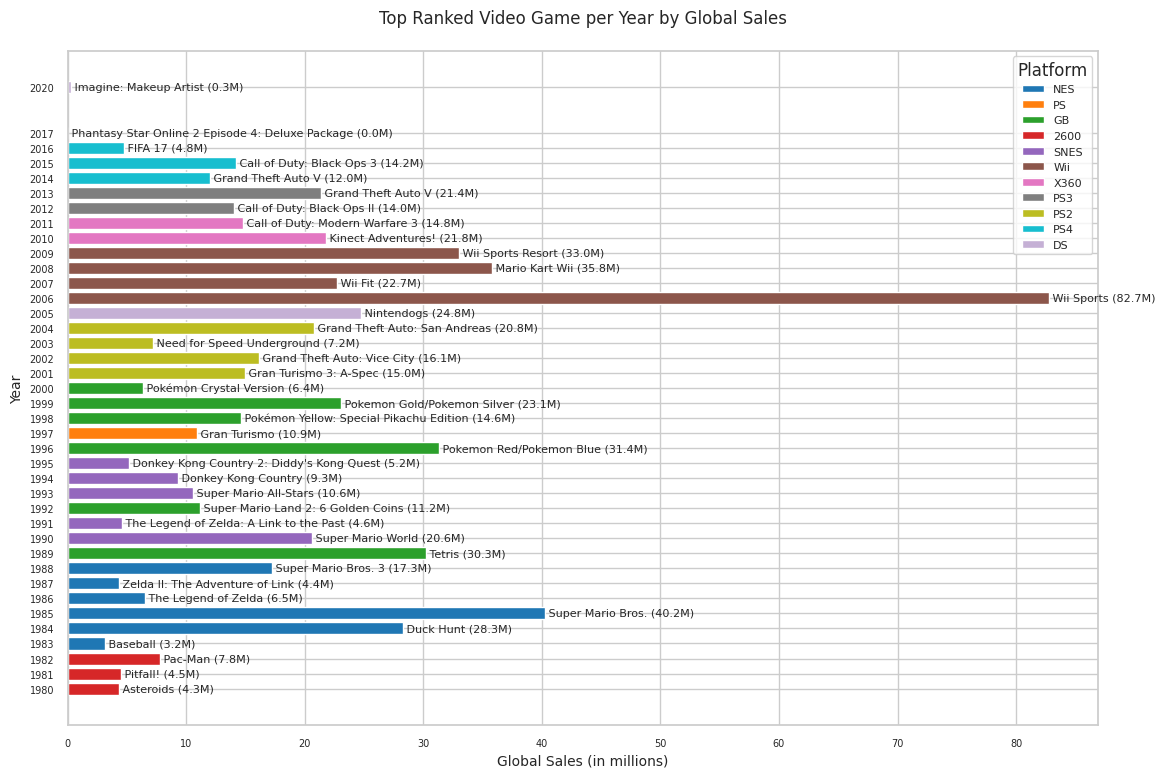

In [24]:

top_per_year = vgsales.loc[vgsales.groupby('Year')['Rank'].idxmin()]
top_per_year = top_per_year.sort_values(by='Year')

custom_colors = {
    'NES': '#1f77b4', 'PS': '#ff7f0e', 'GB': '#2ca02c', '2600': '#d62728',
    'SNES': '#9467bd', 'Wii': '#8c564b', 'X360': '#e377c2', 'PS3': '#7f7f7f',
    'PS2': '#bcbd22', 'PS4': '#17becf', 'DS': '#c5b0d5'
}

plt.figure(figsize=(12, 8))
ax = plt.gca()

bars = ax.barh(top_per_year['Year'], top_per_year['Global_Sales'], color=[custom_colors.get(color) for color in top_per_year['Platform']])

ax.set_yticks(top_per_year['Year'])
ax.set_xlabel('Global Sales (in millions)', fontsize=10)
ax.set_ylabel('Year', fontsize=10)
ax.set_title('Top Ranked Video Game per Year by Global Sales', fontsize=12, pad=20)

for i, bar in enumerate(bars):
    game = top_per_year.iloc[i]
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f" {game['Name']} ({game['Global_Sales']:.1f}M)", va='center', fontsize=8)

legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color,) for color in custom_colors.values()]
ax.legend(legend_elements, custom_colors.keys(), title="Platform", fontsize=8)

plt.tight_layout()
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()


From our previous graph analysis, it was revealed that the quanitity of games avaliable for a given console has little correlation with it sucess. Naturally, the question then becomes: what about the quality of the games? 

The purpose of this graph to list the top-selling games of each year. Interestingly enough, this graph complements out earlier analysis of top-selling platforms by year, each platfomr has its moment of fame. There is a noticable consistency in top-ranking video games often belonging to the popular consoles of that time. 

The standout example of this is the Wii. Games for this platform dominated the top sales from 2006 to 2009, at the height of its era, all four top-selling games belonged to the Wii console. Most notiable is Wii Sports achieving an unparalleled 82.7 million sales, 40 million more than the second highest seller, Super Mario Bros on NES with 40.2 million sales. The success of Wii Sports in 2006 is seemingly the cause of our unexpected dominance of the Sports genre in that year among the dominance of the Action genre. This popularity of Wii games likely contributes to the platfomr's high ranking in total global sales. It is however noteworthy to acknowledge that while the PS2 holds the highest ranking of global sales overall, none of the individual games belonging to the console reach the sales levels of Wii Sports, confirming that a platform's success is dependent on multiple factors and can significantly boost the performance of a console. 


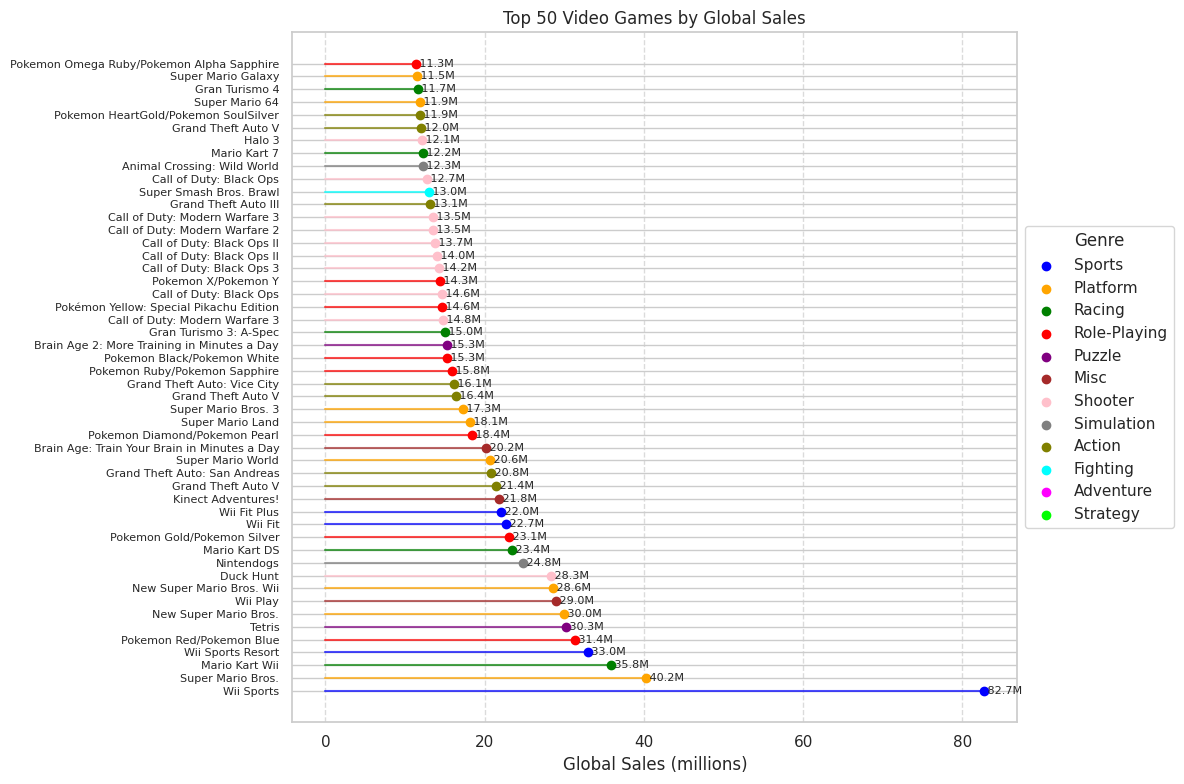

In [63]:
colors = {
    'Sports': 'blue', 'Platform': 'orange', 'Racing': 'green',
    'Role-Playing': 'red', 'Puzzle': 'purple', 'Misc': 'brown',
    'Shooter': 'pink', 'Simulation': 'gray', 'Action': 'olive',
    'Fighting': 'cyan', 'Adventure': 'magenta', 'Strategy': 'lime'
}

top_games = vgsales.nlargest(50, 'Global_Sales')

plt.figure(figsize=(12, 8))

for i, (_, game) in enumerate(top_games.iterrows()):
    color = colors.get(game['Genre'], 'black')
    plt.plot([0, game['Global_Sales']], [i, i], color=color, alpha=0.7)
    plt.scatter(game['Global_Sales'], i, color=color)
    plt.text(game['Global_Sales'], i, f" {game['Global_Sales']:.1f}M", va='center', fontsize=8)

plt.yticks(range(len(top_games)), top_games['Name'], fontsize=8)
plt.xlabel('Global Sales (millions)')
plt.title('Top 50 Video Games by Global Sales')


handles = [plt.scatter([], [], color=c, label=g) for g, c in colors.items()]
plt.legend(handles=handles, title='Genre', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In this graph we are plotting the top 50 video games by global sales, color-coded by genre. Doing this allows us to see how big of a role genre plays in determining top-selling video games.
Interestingly, no single genre consistently dominates the highest selling ranks. Instead, there is a diverse mix of genres among the best selling games. With this diversity, it suggests that genre on its own is a strong predictor for a game's potential sales. While our previous analyses showed certain genres dominating sales in specific years, this diagram of top sellers reveals a different pattern. The success of these games seems to transcend the simple factor of genre, indicating there are more important factors at play. In conclusion, this graph emphasizes that belonging to a particular genre won't guarantees a game's success.

### Publisher

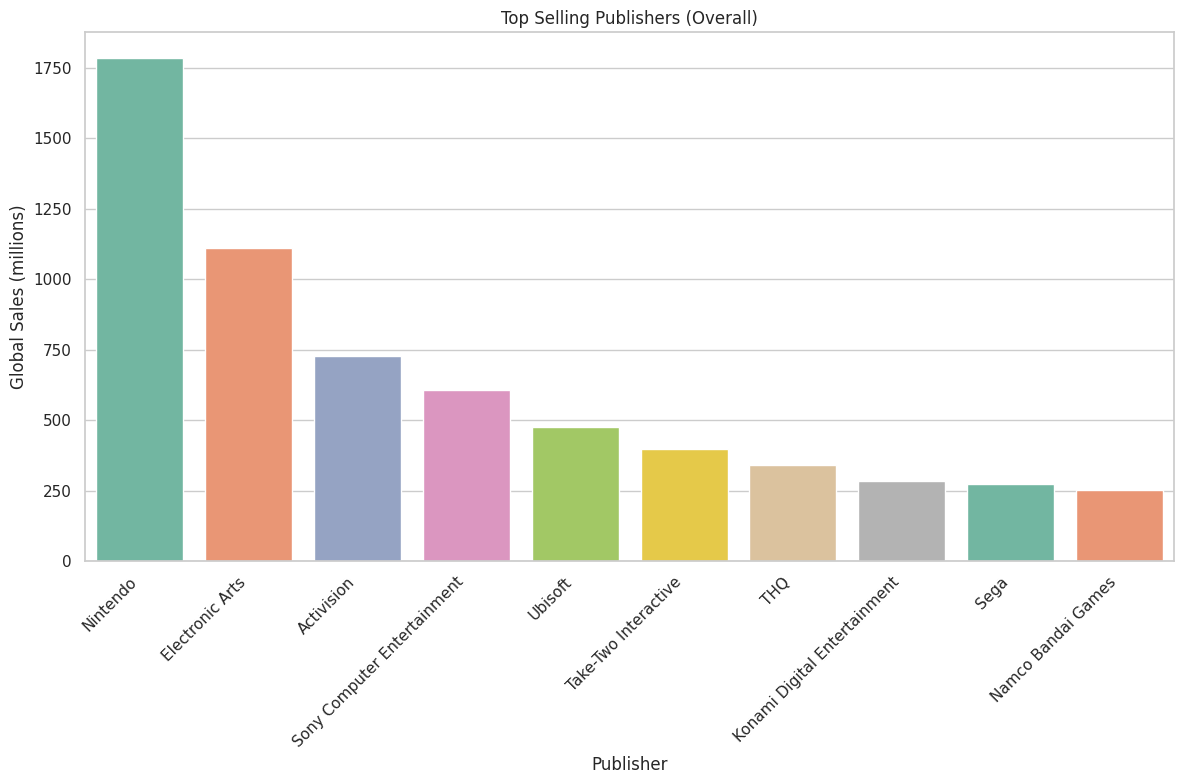

In [28]:
publisher_sales_total = vgsales.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher_sales_total_sorted = publisher_sales_total.sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

sns.barplot(data=publisher_sales_total_sorted, x='Publisher', y='Global_Sales', palette='Set2', hue='Publisher',legend=False)

plt.title('Top Selling Publishers (Overall)')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



This graph ranks the top selling publisher, highlighting the potential influence of success due to brand names. Nintendo stands out as the top selling publisher, dominating but a large margin. This however isn't a surprise considering Nintendo has ownership for some of the higher performing platfroms, such as the NES, Wii, and DS, two of which occupy the top five highest selling platforms. Along with consoles, thes publishers have ownership of video games, with publishers like Electronic Arts mainly producing for consoles such as the Xbox, Playstation, Nintendo Switch, and PC.

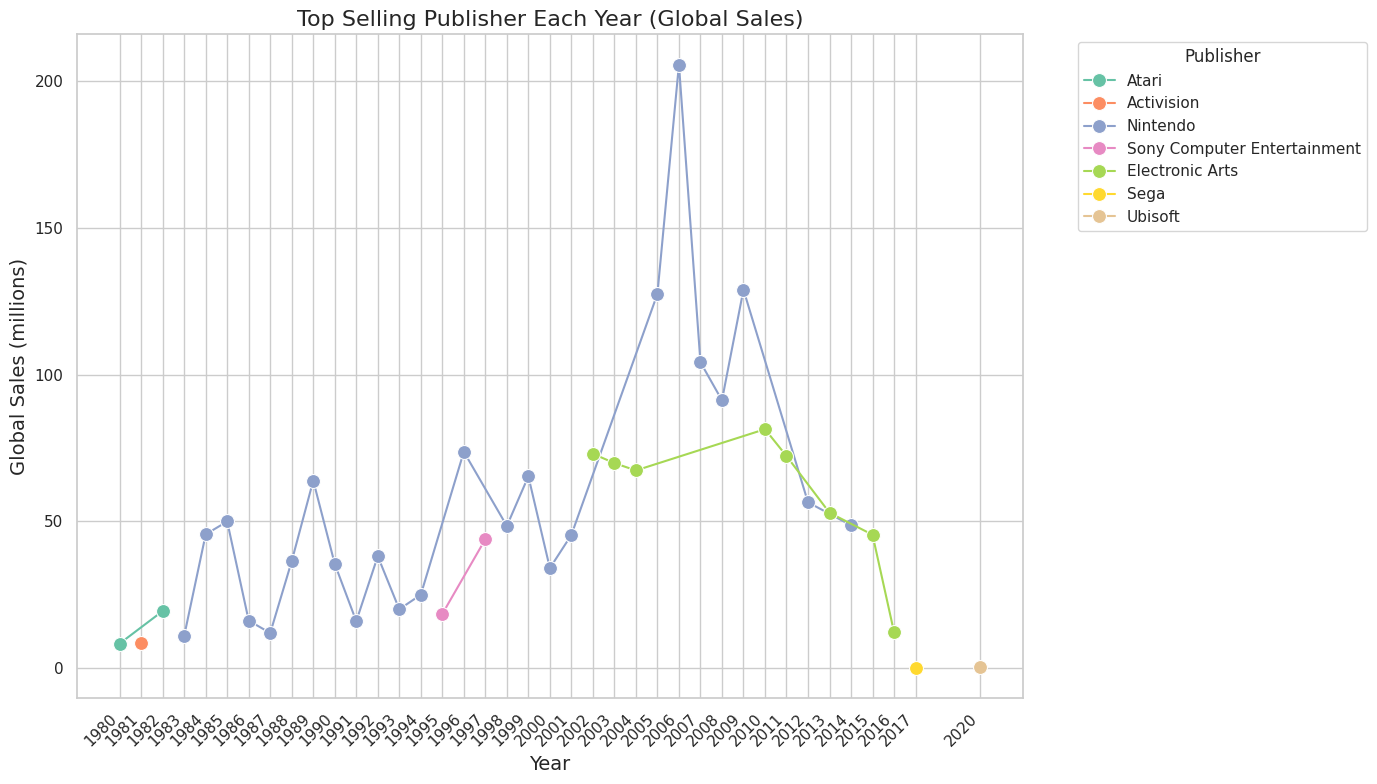

In [28]:
publisher_sales_year = vgsales.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()
top_publishers_year = publisher_sales_year.loc[publisher_sales_year.groupby('Year')['Global_Sales'].idxmax()]

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(data=top_publishers_year, x='Year', y='Global_Sales', hue='Publisher', marker='o', markersize=10, palette='Set2')

plt.title('Top Selling Publisher Each Year (Global Sales)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (millions)', fontsize=14)
plt.xticks(top_publishers_year['Year'].unique())
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



This graph highlights top-selling publishers for each given year, revealing Nintendo's clear streak of dominating the market over time. As discussed in the previous graph, this is most likely due to Nintendo's continued success in producing both high-performing consoles and video games. Nintendo's dominance began with an early market advantage from the NES, followed by future high-selling platforms, and standout video games such as Wii Sports.
While it isn't entirely clear how much a publisher directly influences sales, what is apparent is Nintendo's strategic marketing skills and decision-making in the industry.

## Data Preprocessing

In order to make predictions with this data, we have to find what has the highest correlation with our target value (Global Sales). The higher the correlation is the more of an impact those variables have on Global Sales. These variables will be the leveraged for our models, increasing the accuracy of our predictions. 

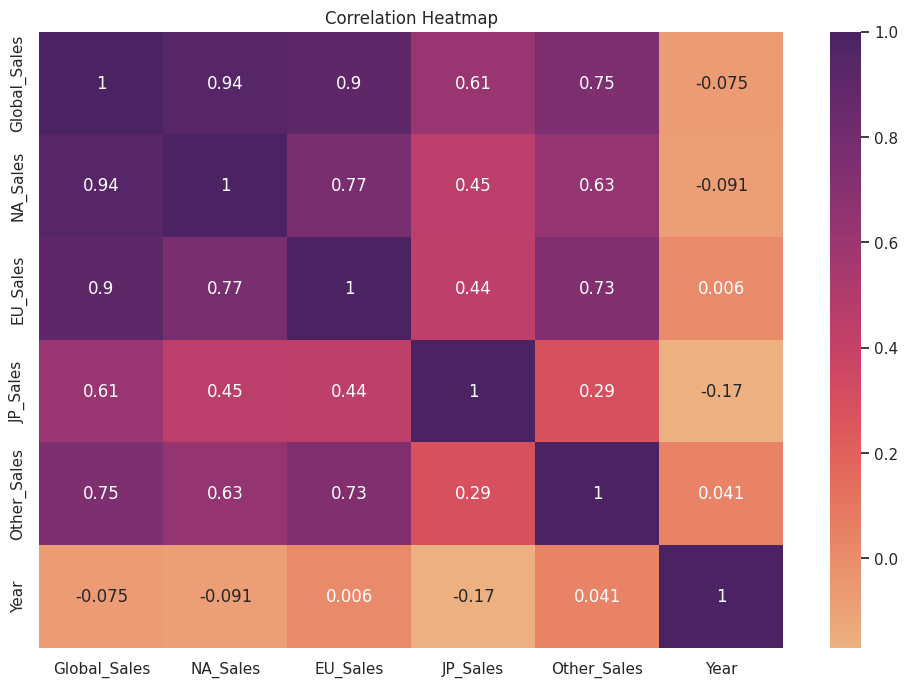

In [31]:
#Making a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(vgsales[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', "Year",]].corr(), annot=True, cmap='flare')
plt.title('Correlation Heatmap')
plt.show()


The main values that have the highest correlation to our target value (Global Sales) is NA_Sales, with other regions following close behind. This is follows suit considering the sales vales seen in the Data Exploration section of this project. On the other side of the spectrum, the values of the year seem to have almost no correlation at all. 

### What to do with Categorical Data

Although we now know what values will be useful in predicting our data, we need to know what data ISNT going to be useful. an example of data that may not be useful to process for training is our categorical data we have from our other remaining columns

In [23]:
# Printing out the unique value amount in each column
cat_cols = [col for col in vgsales.columns if vgsales[col].dtype=='object']
object_nunique = {col: vgsales[col].nunique() for col in cat_cols}
sorted_nunique = sorted(object_nunique.items(), key=lambda x: x[1])
print(sorted_nunique)


[('Genre', 12), ('Platform', 31), ('Publisher', 578), ('Name', 11493)]


BUT because there are so many unique values for our categorical columns, converting them to be used in the data would prove extremely difficult, so they will be avoided.

### Removal of the Year

Although the year column was useful for our data exploration, it is not needed for the training, because its correlation is so low. 

In [37]:
vgsales_prep = vgsales.drop(columns=["Year"]).copy()

## Data Processing 

### Data Splitting

Now that we have dropped our essentially useless column, we can start to split our data into the Training, Valid, and Test Data. As well as the data processing for our models.

We are going to use three different models, XGBRegressor, DecisionTreeRegressor, and RandomForestRegressor, and see which has the lowest Mean Absolute Error (MAE). The reasoning behind this that MAE acts as an interpretation of the average prediction error, hence the lower the less error being made in our predictions when compared to the valid dataset. 

In [38]:
# How we will split the data
from sklearn.model_selection import train_test_split

# How we will tell which of our predictions performs the best
from sklearn.metrics import mean_absolute_error

# 1/3 of the models we will be using
from sklearn.tree import DecisionTreeRegressor

In [39]:
# The features we are going to be using for our Training
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Then we are going to split our data
X = vgsales_prep[features].astype(str)
y = vgsales_prep['Global_Sales']

# Now we can set up the split
# A test size of 0.25 will give you 25% for validation and 75% for training
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.25,random_state=1)

print("TYPE" ,type(valid_X))



TYPE <class 'pandas.core.frame.DataFrame'>


### Messing with Models

##### DecisionTreeRegressor

In [40]:
# Our first model test
model_DT = DecisionTreeRegressor(random_state=2)

# Fit our training data on the model
model_DT.fit(train_X,train_y)

DecisionTreeRegressor(random_state=2)

In [41]:
# Lets make a dataframe to hold the values of each model 
col = {
    'MAE': pd.Series([0,0,0], dtype='float64')
}

regre = ['DecisionTreeRegressor','RandomForestRegressor','XGBRegressor']

results = pd.DataFrame(col,index=regre)
print(results)

                       MAE
DecisionTreeRegressor  NaN
RandomForestRegressor  NaN
XGBRegressor           NaN


In [42]:
# Time to make the first prediction
prediction_DT = model_DT.predict(valid_X)

# Calculating the MAE (error) by comparing the predicted value with the unknown data (valid data)
mae_DT = mean_absolute_error(prediction_DT, valid_y)


results.iloc[0] = float(mae_DT)
results


,MAE
DecisionTreeRegressor,0.054456
RandomForestRegressor,NaN
XGBRegressor,NaN


##### RandomForestRegressor

In [43]:
#Now to try the other models
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(random_state=2)

model_RFR.fit(train_X,train_y)


RandomForestRegressor(random_state=2)

In [44]:
prediction_RFR = model_RFR.predict(valid_X)
mae_RFR = mean_absolute_error(prediction_RFR, valid_y)
results.iloc[1] = float(mae_RFR)
results

,MAE
DecisionTreeRegressor,0.054456
RandomForestRegressor,0.020973
XGBRegressor,NaN


##### XGBRegressor

In [46]:
# Now time for the final model
from xgboost import XGBRegressor

#weird error came up saying that train_X wasn't of an approraite type.
train_X = train_X.astype(float)

model_XGB = XGBRegressor(random_state=2)
model_XGB.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [47]:
#odd issue, doesn't accept valid_X
valid_X = valid_X.astype(float)

prediction_XGB = model_XGB.predict(valid_X)
mae_XGB = mean_absolute_error(prediction_XGB, valid_y)
results.iloc[2] = float(mae_XGB)
results

,MAE
DecisionTreeRegressor,0.054456
RandomForestRegressor,0.020973
XGBRegressor,0.033623


With these results it seems that the RandomForestRegressor has the best MAE since the lower the score, the better the model's performance in terms of accuracy. We could go and move on with this information but instead we will try to make our tests a little more robust by doing Cross Validation of the three models.

In [50]:
#Setting up for scatter plot of data
def scatter_plot(prediction, Model_name):
    errors  = np.abs(prediction - valid_y)
    plt.figure(figsize=(9, 6))
    plt.scatter(np.ones_like(errors), errors, c='blue', alpha=0.5, zorder=2, label='Errors')
    plt.scatter(2 * np.ones_like(prediction), prediction, c='green', alpha=0.5, zorder=2, label='Predictions')
    plt.scatter(3 * np.ones_like(valid_y), valid_y, c='red', alpha=0.5, zorder=2, label='Actual Data')

    plt.title(Model_name + ': Errors, Predictions, and Actual Data')
    plt.ylabel('Global Sales')
    plt.xticks([1, 2, 3], ['Errors', 'Predictions', 'Actual Data'])
    plt.xlim(0.5, 3.5)
    plt.ylim(-3, 90)
    
    plt.legend(loc='upper left')
    plt.show()

##### Attempt to Graph Errors vs Predictions vs Actual Data


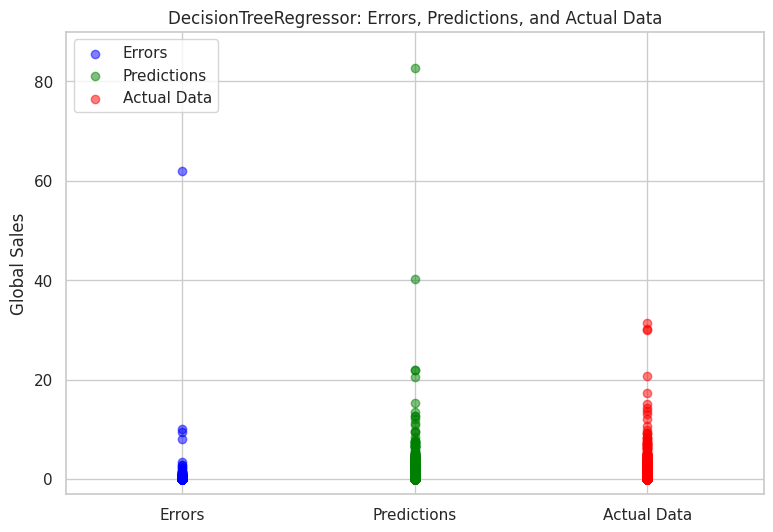

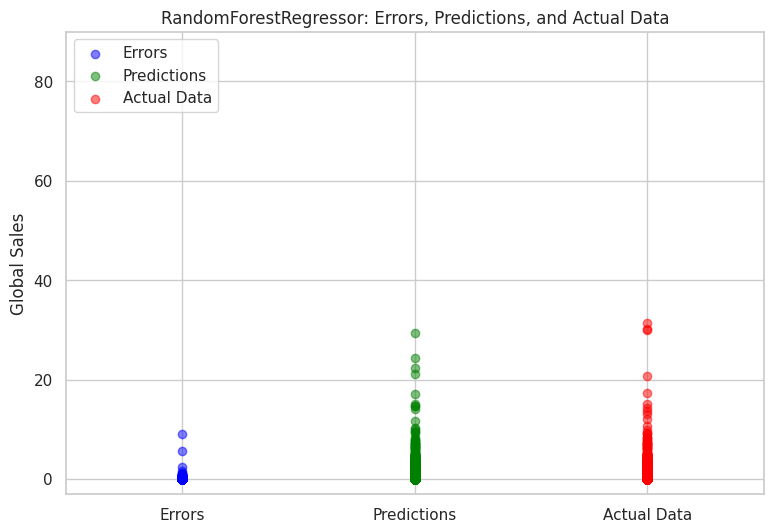

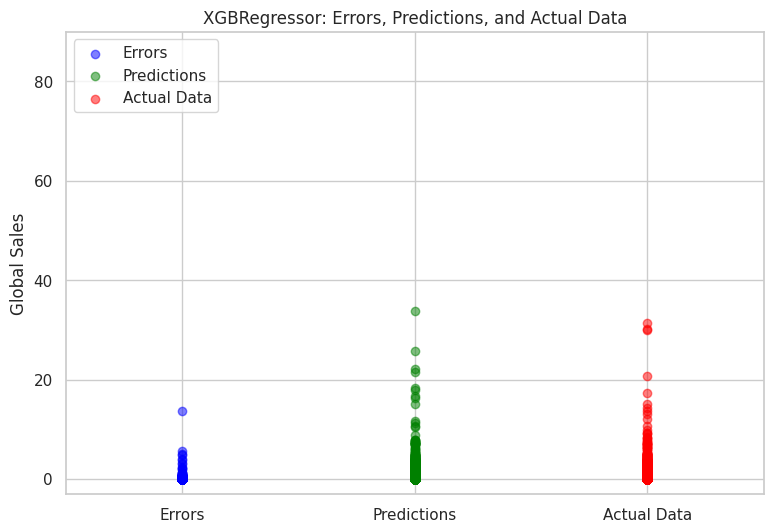

In [51]:
scatter_plot(prediction_DT, 'DecisionTreeRegressor')
scatter_plot(prediction_RFR, 'RandomForestRegressor')
scatter_plot(prediction_XGB, 'XGBRegressor')


These diagrams provide a visual representation of each model's performance from our initial run through. The 'Errors' column shows the absolute differences between predicted and actual sales values. The spacing between these error points indicates the magnitude of prediction inaccuracies ( the wider apart, the larger error, the exact same as MAE). As was demonstrated by the Mean Absolute Error (MAE) results, the Random Forest Regression model appears to have the smallest error margin. 

### Cross Validation

Cross vailation is the process of divding our data into multiple sections, or folds are they are typically referred to as, where one section acts as the validation set and the rest as the training set, which is then ran through our models. Different combinations of validation and training sets are made based on the number of folds had. With these multiple sets of data being ran through our models, it helps in producing a more robust estimate of each model's performance.

In [54]:
from sklearn.model_selection import cross_val_score
# Running each Cross Validation with cv 5
scores_DT = -cross_val_score(model_DT,X,y,cv=5,scoring='neg_mean_absolute_error')
scores_RFR = -cross_val_score(model_RFR,X,y,cv=5,scoring='neg_mean_absolute_error')

X = X.astype(float)

scores_XGB = -cross_val_score(model_XGB,X,y,cv=5,scoring='neg_mean_absolute_error')

results['Mean_MAE'] = [scores_DT.mean(), scores_RFR.mean(), scores_XGB.mean()]
results['Std_MAE'] = [scores_DT.std(), scores_RFR.std(), scores_XGB.mean()]
results

,MAE,Mean_MAE,Std_MAE
DecisionTreeRegressor,0.054456,0.336613,0.538114
RandomForestRegressor,0.020973,0.324417,0.545318
XGBRegressor,0.033623,0.301442,0.301442


After running the cross validation our values go up by a decent amount. Originally it was seen that RandomForestRegressor(RFR) was the best performer with only having .02 sales error off, but after running the multiple folds of Cross Validation, it seems that XGBRegressor is taking the lead with having the lowest Mean and Standard Deviation. This means that (within our tests) XGB proves more consistent over multiple splits than RFR.

In [55]:
# Running each Cross Validation with cv 15
scores_DT = -cross_val_score(model_DT,X,y,cv=15,scoring='neg_mean_absolute_error')
scores_RFR = -cross_val_score(model_RFR,X,y,cv=15,scoring='neg_mean_absolute_error')
scores_XGB = -cross_val_score(model_XGB,X,y,cv=15,scoring='neg_mean_absolute_error')

results['Mean_MAE2'] = [scores_DT.mean(), scores_RFR.mean(), scores_XGB.mean()]
results['Std_MAE2'] = [scores_DT.std(), scores_RFR.std(), scores_XGB.mean()]
results



,MAE,Mean_MAE,Std_MAE,Mean_MAE2,Std_MAE2
DecisionTreeRegressor,0.054456,0.336613,0.538114,0.209205,0.599649
RandomForestRegressor,0.020973,0.324417,0.545318,0.193969,0.604471
XGBRegressor,0.033623,0.301442,0.301442,0.176231,0.176231


As more folds are added, XGB continues to outperform the other models. While RFR dropped in its Mean, it noticably increased in the Standard Deviation by 0.059153. DTR on the other hand had a decrease in its Mean, and an increase in its Standard deviation. Unlike that other models, XGB's values decreased in both the Mean and Standard Deviation, significant reductions in error.

Although Cross Validation gave us a good look at what may be the better option, lets take a look at another method for narrowing down our options

### Hyper Parameter Tuning

With HPT (HyperParameterTuning) you are essentially just adding specifications to the models themselves to see if you can push the results more towards optimization. The bonus is the manual ability to tweak everything, the downside is also the manual ability to tweak everything... Luckily that is why something like GridSearch exists, which is what will help find the better tunes to use for us

In [56]:
from sklearn.model_selection import GridSearchCV

#we are first going to try this with DT

#creating a parameter grid
pg_DT = {
    'max_depth': [None,10,20,30],
    'min_samples_split': [5,10,20],
    'min_samples_leaf': [1,2,4],
}

grid_search_DT = GridSearchCV(
    estimator=model_DT,
    param_grid=pg_DT,
    cv=15,
    scoring='neg_mean_absolute_error',
    verbose=1
    )

grid_search_DT.fit(X,y)
best_model_DT = grid_search_DT.best_estimator_
predictions_DT = best_model_DT.predict(valid_X)
mae_DT_HPT = mean_absolute_error(predictions_DT, valid_y)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


In [41]:
mae_DT_HPT

np.float64(0.010923614797671819)

With those HPT alone we were able to get a MAE of 0.0109 for DT which is a significant drop from even our lowest MAE previously for DT. and it seems that our parameters we chose were also already good. Meaning I see no need to change it, even though it took little to no time to process

In [42]:
best_model_DT

DecisionTreeRegressor(min_samples_split=5, random_state=2)

Now it is time to run similar tests on the other models and then save them in the DataFrame

In [52]:

#creating a parameter grid for RFR this time
#basically the same besides adding the n estimators.
pg_RFR = {
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'n_estimators': [66, 73, 81],
}

grid_search_RFR = GridSearchCV(
    estimator=model_RFR,
    param_grid=pg_RFR,
    cv=15,
    scoring='neg_mean_absolute_error',
    verbose=1
    )

grid_search_RFR.fit(X,y)
best_model_RFR = grid_search_RFR.best_estimator_
predictions_RFR = best_model_RFR.predict(valid_X)
mae_RFR_HPT = mean_absolute_error(predictions_RFR, valid_y)

NameError: name 'GridSearchCV' is not defined

*be weary, the above code took 5m45.6s to compute*

In [42]:
best_model_RFR

RandomForestRegressor(max_depth=20, n_estimators=103, random_state=2)

In [43]:
mae_RFR_HPT

np.float64(0.008058043807064253)

In [50]:
#we are first going to try this with DT

#creating a parameter grid
pg_XGB = {
    'max_depth': [None,10,20,30],
    'learning_rate': [0.01, 0.1, 0.3],
    'reg_alpha': [0,0.1,0.5],
    'reg_lambda': [0,0.1,0.5],
}

grid_search_XGB = GridSearchCV(
    estimator=model_XGB,
    param_grid=pg_XGB,
    cv=15,
    scoring='neg_mean_absolute_error',
    verbose=1
    )

grid_search_XGB.fit(X,y)
best_model_XGB = grid_search_XGB.best_estimator_
predictions_XGB = best_model_XGB.predict(valid_X)
mae_XGB_HPT = mean_absolute_error(predictions_XGB, valid_y)

Fitting 15 folds for each of 108 candidates, totalling 1620 fits


In [51]:
best_model_XGB

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [52]:
mae_XGB_HPT

np.float64(0.009377912238365916)

*be weary, the above code took 6m47.6s to compute*

In [44]:
#putting our results into a DataFrame
results['MAE_HPT'] = [mae_DT_HPT, mae_RFR_HPT, mae_XGB_HPT]
results

NameError: name 'mae_RFR_HPT' is not defined

After messing around with HPT for awhile, The results we have gotten are quite adequate. Although there is likely a way to get the numbers even lower- having the numbers for sales be this low with tuning is almost good enough to not be worried about.

Although the RFR has the lower value for the HPT, we will be choosing XGB as the final model due to the fact it performed overall best in multiple categories besides the final. AND if it performed better in the previous categories it likely can be tuned further to perform even better. One would just need to find out that tuning.

## Final Model : XGBRegressor

Now that we have chosen our final model(XGBRegressor), we are going to run it through all of the steps again

In [ ]:

#Giving the final model its rightful name and throne
final_model = XGBRegressor(
    max_depth=best_model_XGB.max_depth,
    learning_rate=best_model_XGB.learning_rate,
    reg_alpha=best_model_XGB.reg_alpha,
    reg_lambda=best_model_XGB.reg_lambda,
    n_estimators=best_model_XGB.n_estimators,
    random_state=2,
)

#fitting the model
final_model.fit(train_X,train_y)

#Run it on the validation set
final_predictions = final_model.predict(valid_X)
final_mae = mean_absolute_error(valid_y, final_predictions)

#turning our nice little values into a dataframe for all to see!!
# finaldata = {
#     'final_MAE': [final_mae],
#     'HPT_XGB_MAE': [mae_XGB_HPT],
# }
# anIndex = ['XGBRegressor']
# actually I am quite sure this would just block the other stuff from being printed
print(f'Final MAE on Validation Set: {final_mae:.6f}')
print(f'Hyper-Tuned XGB MAE: {mae_XGB_HPT:.6f}')


# A scatter plot comparing the actual game sales with the predicted game sales
plt.figure(figsize=(10, 6))
plt.scatter(valid_y, final_predictions, alpha=0.3)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], '--r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Global Sales')
plt.show()

# Looking at the features that were the most important,
# Although we didnt have many
important = final_model.feature_importances_
feat = train_X.columns
important_final = pd.DataFrame({'Feature': feat, 'Importance': important})
important_final = important_final.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y="Feature", data=important_final)
plt.title("Important Features")
plt.show()

print("Summary and Conclusion:")
print(f"The final model, XGBRegressor, has been trained and evaluated.")
print(f"Mean Absolute Error (MAE) on the validation set: {final_mae:.6f}")
print("The feature importance plot shows the most significant features contributing to the model's predictions.")
print("The model demonstrates good performance and generalizes well on the validation set, indicating it is a suitable fit for predicting global sales.")

NameError: name 'best_model_XGB' is not defined